# Домашнее задание по теме: Классификация

## Подготовка окружения

In [ ]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [1]:
!conda install pandas matplotlib numpy seaborn scikit-learn -y

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\skovalchuk\Anaconda3\envs\LevelUP

  added / updated specs:
    - matplotlib
    - numpy
    - pandas
    - scikit-learn
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.5.25  |       haa95532_1         112 KB
    certifi-2021.5.30          |   py39haa95532_0         140 KB
    scikit-learn-0.24.2        |   py39hf11a4ad_1         4.9 MB
    ------------------------------------------------------------
                                           Total:         5.1 MB

The following NEW packages will be INSTALLED:

  joblib             pkgs/main/noarch::joblib-1.0.1-pyhd3eb1b0_0
  scikit-learn       pkgs/main/win-64::scikit-learn-0.24.2-py39hf11a4ad_1
  threadpoolctl      pkgs/main/noarch::threadpoolctl-2.1.0-pyh5ca1d4c_0

The following packages will be UPDATED:


## **ВНИМАНИЕ**

- **Задания описаны кратко, только самое необходимое, в основном только идеи и подсказки. Это творческая работа.**

- Для выполнения заданий можно использовать любые удобные способы, если в комментариях к заданию не указан конкретный метод.

- Желательно использовать максимум пройденной информации или более продвинутые способы (если нашли самостоятельно).

- Желательно писать свои идеи/мысли по поводу методов/результатов.

- В строке "Подсказка" могут быть перечислены какие-то методы, которыми можно воспользоваться, но это не обязательно, так как это только один из множества вариантов (не факт, что лучший).

- Обязательно **использовать `Pipeline`**.

- Графики можно рисовать любым способом / цветом и т.п. Главное, чтобы было понятно, что там изображено.

- При выполнении задания необходимо понимать, что значит каждое слово (на английском). Если значение слова непонятно, то необходимо разобраться с его значением самостоятельно. Пожалуйста, будьте внимательны, перепроверяйте значения слов, если не уверены.

## Импорт необходимых пакетов

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

## Загрузка данных

[Patient Treatment Classification](https://www.kaggle.com/saurabhshahane/patient-treatment-classification?select=data-ori.csv)

In [92]:
df = pd.read_csv('data-ori.csv')
df

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out
...,...,...,...,...,...,...,...,...,...,...,...
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,F,in
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,F,in
4409,33.2,11.2,3.47,7.2,235,32.3,33.7,95.7,93,F,out
4410,31.5,10.4,3.15,9.1,187,33.0,33.0,100.0,98,F,in


## Преобразование типов

Привести в порядок типы данных. В результате не должно быть типа `object`.

In [115]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(categories=[['F', 'M'], ['out', 'in']])
df[['gender', 'source_enc']]  = ord_enc.fit_transform(df[['SEX', 'SOURCE']])
df_2 = df.drop(['SEX', 'SOURCE', 'HAEMATOCRIT'], axis=1)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMOGLOBINS  4412 non-null   float64
 1   ERYTHROCYTE   4412 non-null   float64
 2   LEUCOCYTE     4412 non-null   float64
 3   THROMBOCYTE   4412 non-null   int64  
 4   MCH           4412 non-null   float64
 5   MCHC          4412 non-null   float64
 6   MCV           4412 non-null   float64
 7   AGE           4412 non-null   int64  
 8   gender        4412 non-null   float64
 9   source_enc    4412 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 344.8 KB


## Разделить на train/test

- Разделить данные на `y` и `X`.
- `y` - это колонка `gender`.
- Разделить данные на train / test.
- **В дальнейшем при анализе использовать строго `train` данные и не подсматривать в `test`.**

In [116]:
target_col = 'gender'
y = df_2[target_col].copy()
X = df_2.drop(target_col, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Баланс классов

- Проверить классы `y` на сбалансированность.

<AxesSubplot:xlabel='gender', ylabel='count'>

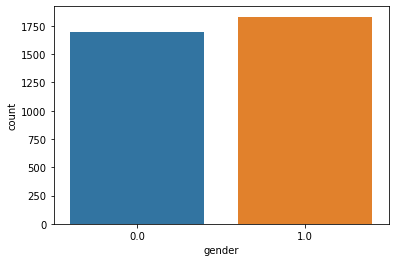

In [117]:
sns.countplot(x=y_train)

## Выбросы

- Есть ли выбросы? Каково распределение данных?
    - `hist`
    - `kde`
    - `boxplot`
- Нужно ли с этим что-то делать?

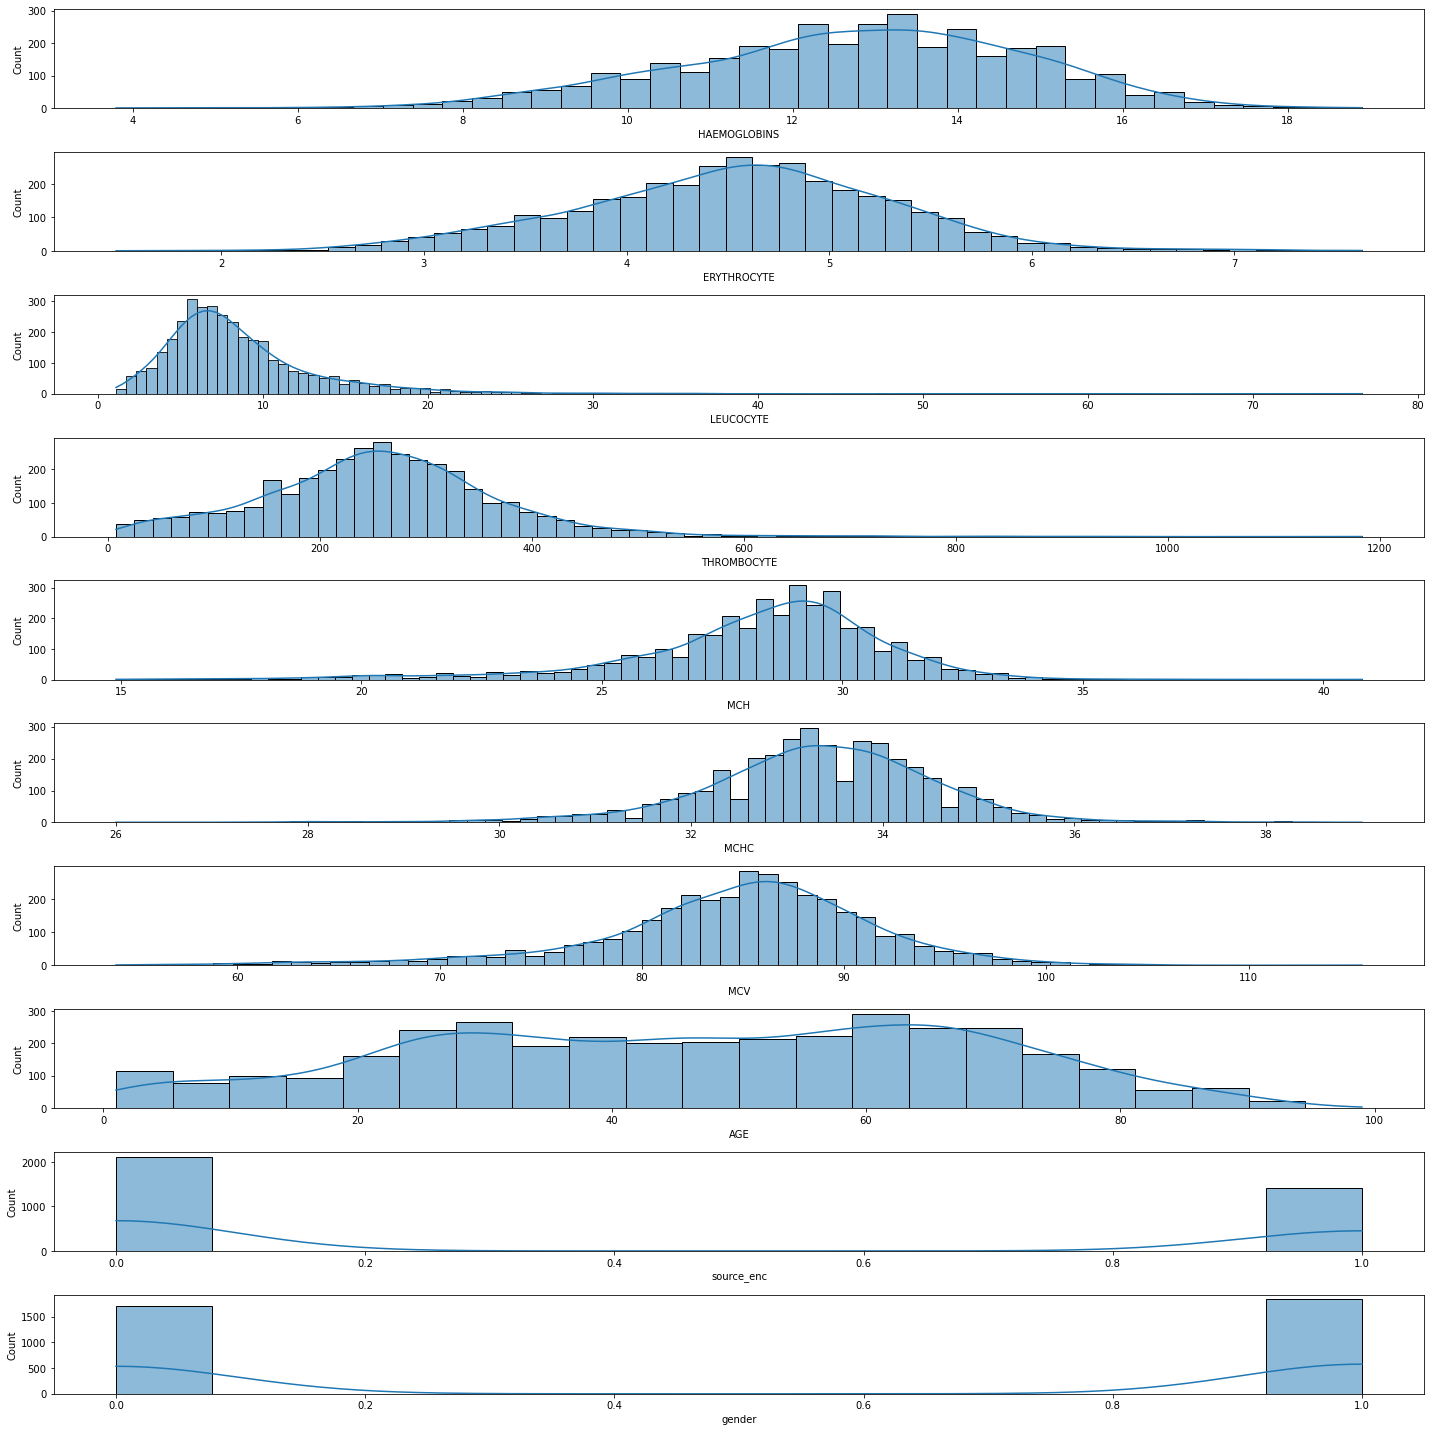

In [118]:
df_train = X_train.join(y_train)

df_num_cols = df_train.select_dtypes(include=np.number)
df_num_cols_len = len(df_num_cols.columns)

fig, axs = plt.subplots(df_num_cols_len, 1, figsize=(20, 20))

for index, num_col in enumerate(df_num_cols):
    sns.histplot(data=df_train[num_col], 
                 kde=True, 
                 ax=axs[index])
fig.tight_layout()

## Анализ корреляций

- Проверить нет ли мультиколлинеарности.
- Если есть, то нужно ли что-то с этим делать?

Подсказка: в `sns.heatmap` можно указать параметры `vmin`, `vmax` для более адекватного распределения цвета.

Text(0.5, 1.0, 'Correlation Matrix of features')

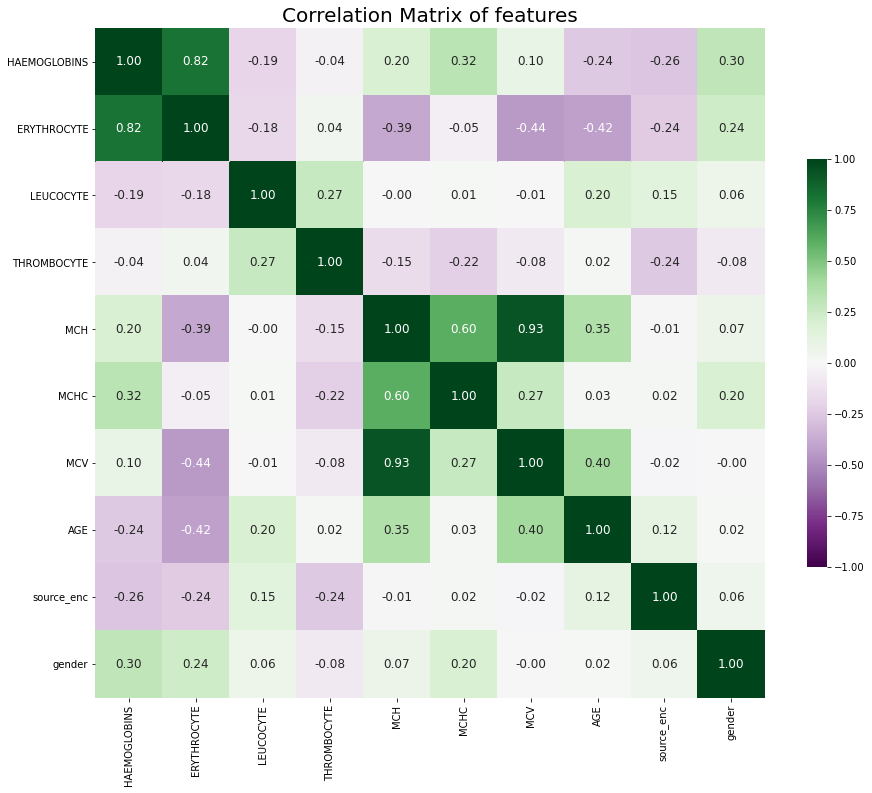

In [120]:
#МУЛЬТИКОЛЛИНЕАРНОСТЬ МЕЖДУ ГЕМОГЛОБИНОМ, ЭРИТРОЦИТАМИ И ГЕМАТОКРИТОМ. Удалил только Гематокрит. Он меньше всего коррелировал с полом. Если удалить еще что-то падает качество.

correlation_matrix = df_train.corr()

plt.figure(figsize=(15, 15))

ax = sns.heatmap(
    correlation_matrix,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='PRGn',
    cbar_kws={"shrink": .5},
    annot_kws={"size": 12},
    robust=True,
    vmin=-1, 
    vmax=1
)

plt.title('Correlation Matrix of features', fontsize=20)

## Эксперименты с моделями

- Можно использовать любое количество признаков.
- Если необходимо, то использовать методы feature engineering.
- Помнить о том, что может быть полезна нормализация/стандартизация.
- Провести эксперименты на всех изученных моделях.
    - Попробовать разные модели.
    - Попробовать различные параметры `scoring` для `GridSearch`.
    - Результаты экспериментов желательно собрать в одну таблицу и по возможности визуализировать (`heatmap`, `confusion_matrix`).
- Проанализировать результаты (различные метрики). Написать выводы.

In [125]:
y_train_enc = LabelEncoder().fit_transform(y_train)

#num_cols = ['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'MCH', 'MCHC', 'AGE']
#num_cols = ['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'MCH', 'MCHC', 'AGE']
#num_cols = ['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'MCH', 'MCHC', 'AGE']
num_cols = ['HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE']
#num_cols = ['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE']
bin_cols = ['source_enc']

num_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num_transformer', num_transformer, num_cols),
        ('passthrough', 'passthrough', bin_cols),
])

gs_scoring = ['roc_auc', 
              'recall', 
              'precision', 
              'f1', 
              'balanced_accuracy', 
              'accuracy']


models = {
    'DecisionTreeClassifier': (DecisionTreeClassifier, 
                               {'model__max_depth': [5, 7, 10],
                                'model__criterion': ['gini', 'entropy']}),
    
    'LogisticRegression': (LogisticRegression, 
                           {'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}),
    
    'SVC': (SVC, 
            {'model__degree': [2, 3, 4, 6, 8, 10]}),
    
    'KNeighborsClassifier': (KNeighborsClassifier, 
                             {'model__n_neighbors': [4, 5, 6, 7, 8], 
                              'model__weights': ['uniform', 'distance']})
}


import time

total = len(models) * len(gs_scoring)
index = 1
experiments = {}

for name, (model, param_grid) in models.items():
    experiments[name] = {}
    for scoring in gs_scoring:
        start = time.time()
        pipeline = Pipeline(steps = [
            ('preprocessor', preprocessor),
            ('model', model())
        ])
        
        print(f"{name} | {scoring} ...", end=' ')
        
        model_gs = GridSearchCV(pipeline, param_grid, n_jobs=-1, scoring=scoring)
        model_gs.fit(X_train, y_train_enc)
        
        experiments[name].update({scoring: model_gs})
        end = time.time()

        print(f"finished! ({end - start:0.2f}s) {index}/{total}")
        
        print(f"best_params: {model_gs.best_params_}")
        print(f"best_score: {model_gs.best_score_:0.2f}\n")
        
        index += 1
    print('-' * 20, '\n')


DecisionTreeClassifier | roc_auc ... finished! (0.39s) 1/24
best_params: {'model__criterion': 'entropy', 'model__max_depth': 5}
best_score: 0.78

DecisionTreeClassifier | recall ... finished! (0.27s) 2/24
best_params: {'model__criterion': 'entropy', 'model__max_depth': 5}
best_score: 0.72

DecisionTreeClassifier | precision ... finished! (0.29s) 3/24
best_params: {'model__criterion': 'entropy', 'model__max_depth': 7}
best_score: 0.73

DecisionTreeClassifier | f1 ... finished! (0.32s) 4/24
best_params: {'model__criterion': 'entropy', 'model__max_depth': 5}
best_score: 0.72

DecisionTreeClassifier | balanced_accuracy ... finished! (0.28s) 5/24
best_params: {'model__criterion': 'entropy', 'model__max_depth': 7}
best_score: 0.71

DecisionTreeClassifier | accuracy ... finished! (0.27s) 6/24
best_params: {'model__criterion': 'entropy', 'model__max_depth': 7}
best_score: 0.70

-------------------- 

LogisticRegression | roc_auc ... 

C:\Users\skovalchuk\Anaconda3\envs\LevelUP\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


finished! (0.38s) 7/24
best_params: {'model__solver': 'saga'}
best_score: 0.74

LogisticRegression | recall ... finished! (0.40s) 8/24
best_params: {'model__solver': 'newton-cg'}
best_score: 0.72

LogisticRegression | precision ... finished! (0.34s) 9/24
best_params: {'model__solver': 'newton-cg'}
best_score: 0.69

LogisticRegression | f1 ... 

C:\Users\skovalchuk\Anaconda3\envs\LevelUP\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


finished! (0.38s) 10/24
best_params: {'model__solver': 'sag'}
best_score: 0.70

LogisticRegression | balanced_accuracy ... 

C:\Users\skovalchuk\Anaconda3\envs\LevelUP\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


finished! (0.42s) 11/24
best_params: {'model__solver': 'sag'}
best_score: 0.68

LogisticRegression | accuracy ... 

C:\Users\skovalchuk\Anaconda3\envs\LevelUP\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


finished! (0.35s) 12/24
best_params: {'model__solver': 'sag'}
best_score: 0.68

-------------------- 

SVC | roc_auc ... finished! (5.41s) 13/24
best_params: {'model__degree': 2}
best_score: 0.81

SVC | recall ... finished! (5.24s) 14/24
best_params: {'model__degree': 2}
best_score: 0.71

SVC | precision ... finished! (5.21s) 15/24
best_params: {'model__degree': 2}
best_score: 0.76

SVC | f1 ... finished! (5.28s) 16/24
best_params: {'model__degree': 2}
best_score: 0.73

SVC | balanced_accuracy ... finished! (5.36s) 17/24
best_params: {'model__degree': 2}
best_score: 0.74

SVC | accuracy ... finished! (5.20s) 18/24
best_params: {'model__degree': 2}
best_score: 0.73

-------------------- 

KNeighborsClassifier | roc_auc ... finished! (0.58s) 19/24
best_params: {'model__n_neighbors': 8, 'model__weights': 'distance'}
best_score: 0.81

KNeighborsClassifier | recall ... finished! (0.69s) 20/24
best_params: {'model__n_neighbors': 6, 'model__weights': 'distance'}
best_score: 0.74

KNeighborsCl

## Анализ результатов



plot matrix: 6x4


<AxesSubplot:ylabel='name-scorer'>

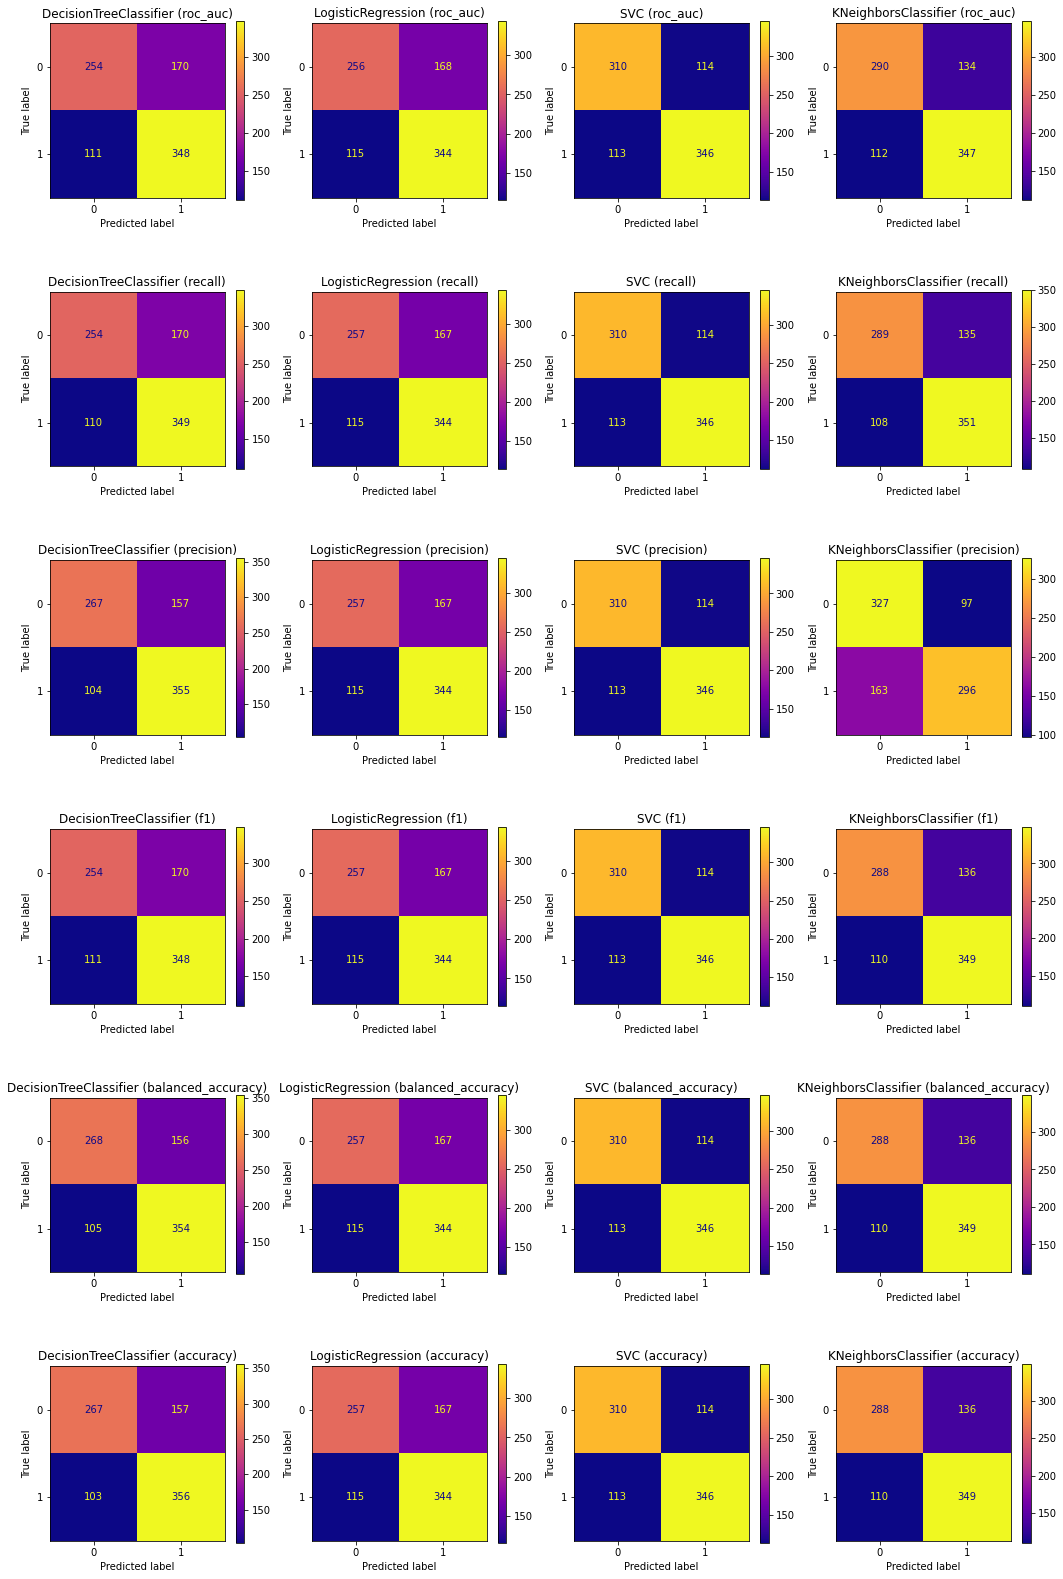

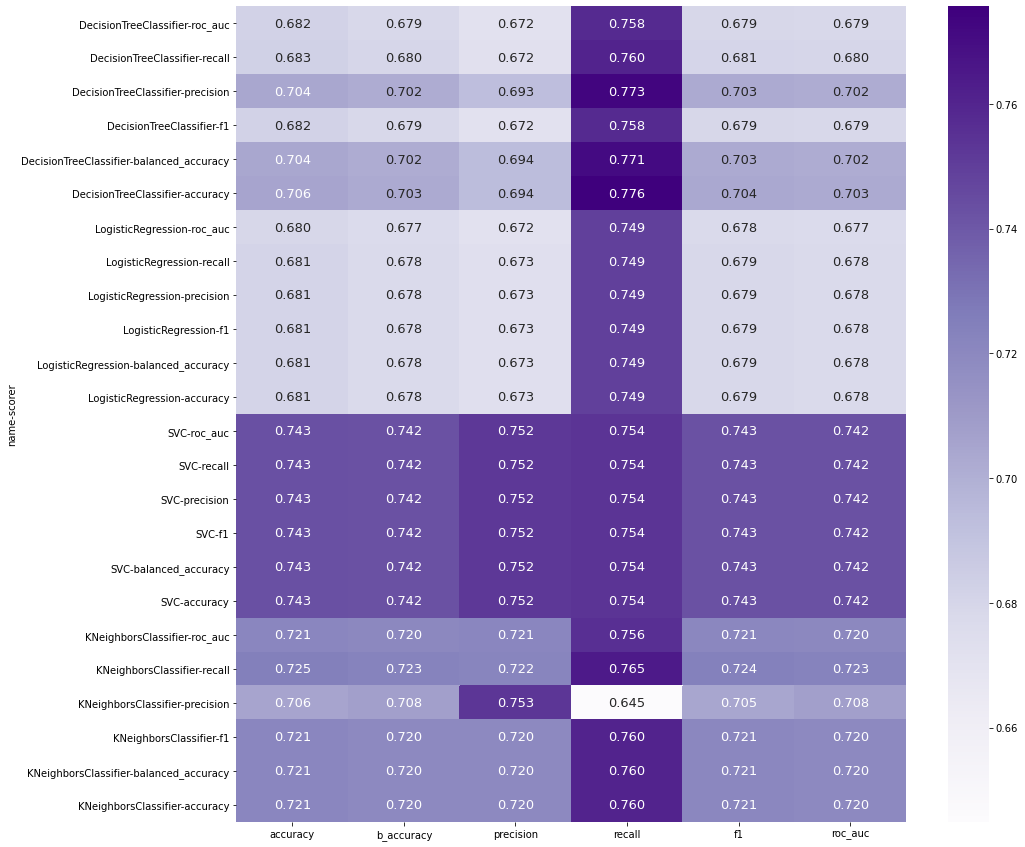

In [126]:
y_train_enc = LabelEncoder().fit_transform(y_train)
y_test_enc = LabelEncoder().fit_transform(y_test)

columns = ['accuracy', 'b_accuracy', 'precision', 'recall', 'f1', 'roc_auc']

def evaluate_model(y_predicted, X_test, y_test):       
    accuracy = accuracy_score(y_test, y_predicted)
    balanced_accuracy = balanced_accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted)
    recall = recall_score(y_test, y_predicted)
    f1 = f1_score(y_test, y_predicted, average='weighted')
    roc_auc = roc_auc_score(y_test, y_predicted)
    
    return pd.Series([accuracy, balanced_accuracy, precision, recall, f1, roc_auc], 
                     index=columns)


eval_df = pd.DataFrame(columns=columns)
name_scorer_index = []

names_len = len(models)
scorers_len = len(gs_scoring)
fig, axes = plt.subplots(scorers_len, names_len, figsize=(scorers_len*3, names_len*7))

for name_index, (name, models_by_scorer) in enumerate(experiments.items()):
    for scorer_index, (scorer, model) in enumerate(models_by_scorer.items()):
        name_scorer_index.append((name, scorer))

        y_predicted = model.predict(X_test)
        ax=axes[scorer_index][name_index]
        plot_confusion_matrix(model, X_test, y_test_enc, ax=ax, cmap='plasma')
        ax.set_title(f'{name} ({scorer})')
        
        eval_res = evaluate_model(y_predicted, X_test, y_test_enc)        
        eval_df = eval_df.append(eval_res, ignore_index=True)
        
index = pd.MultiIndex.from_tuples(name_scorer_index, names=["name", "scorer"])
eval_df.set_index(index, inplace=True)

print(f'\n\nplot matrix: {scorers_len}x{names_len}')

# расстояние между графиками по горизонтали и вертикали
fig.subplots_adjust(hspace=0.5, wspace=0.2)

min_val = eval_df.min().min()
max_val = eval_df.max().max()

plt.figure(figsize=(15, 15))
sns.heatmap(eval_df, 
            annot=True, 
            annot_kws={"size": 13}, 
            fmt="1.3f", 
            cmap='Purples', 
            vmin=min_val, 
            vmax=max_val)

## Сохранение лучшей модели

In [128]:
import joblib

joblib.dump(experiments['SVC']['recall'], './example_svc.joblib')

['./example_svc.joblib']